# 課題6. フィルタ

- ソースコードを実行し，ソースコードを読んで何をしているかを確認しなさい．
- プログラムを変更しフィルタの値を変え，移動平均フィルタ，ラプラシアンフィルタを実装しなさい．
- !レポート!　原理（数式・ソースコード）と実行結果（printされる画素値）を照らし合わせて，それらフィルタの処理を分かりやすく説明しなさい

元画像
[[  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 255 255 255 255 255 255 255 255   0   0]
 [  0   0 255 255 255 255 255 255 255 255   0   0]
 [  0   0 255 255 255 255 255 255 255 255   0   0]
 [  0   0 255 255 255 255 255 255 255 255   0   0]
 [  0   0 255 255 255 255 255 255 255 255   0   0]
 [  0   0 255 255 255 255 255 255 255 255   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]


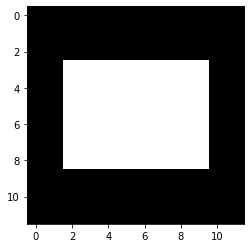

変換後の画像
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  51. 102. 153. 153. 153. 153. 153. 153. 102.  51.   0.]
 [  0. 102. 255. 255. 255. 255. 255. 255. 255. 255. 102.   0.]
 [  0. 153. 255. 255. 255. 255. 255. 255. 255. 255. 153.   0.]
 [  0. 153. 255. 255. 255. 255. 255. 255. 255. 255. 153.   0.]
 [  0. 153. 255. 255. 255. 255. 255. 255. 255. 255. 153.   0.]
 [  0. 153. 255. 255. 255. 255. 255. 255. 255. 255. 153.   0.]
 [  0. 102. 255. 255. 255. 255. 255. 255. 255. 255. 102.   0.]
 [  0.  51. 102. 153. 153. 153. 153. 153. 153. 102.  51.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


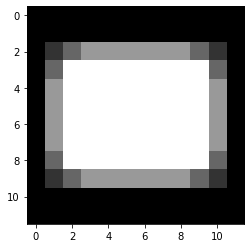

変換後の画像
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.   0.]
 [  0. 255.   0.   0.   0.   0.   0.   0.   0.   0. 255.   0.]
 [  0. 255.   0.   0.   0.   0.   0.   0.   0.   0. 255.   0.]
 [  0. 255.   0.   0.   0.   0.   0.   0.   0.   0. 255.   0.]
 [  0. 255.   0.   0.   0.   0.   0.   0.   0.   0. 255.   0.]
 [  0. 255.   0.   0.   0.   0.   0.   0.   0.   0. 255.   0.]
 [  0. 255.   0.   0.   0.   0.   0.   0.   0.   0. 255.   0.]
 [  0. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


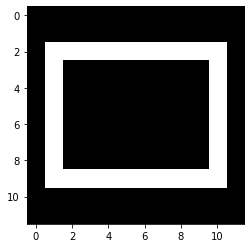

In [18]:
## 移動平均フィルタ
from pylab import *
from cv2 import imread

# 画像をダウンロード&読み込み
#!wget -q https://raw.githubusercontent.com/naka-tomo/image_proc_exp/master/kadai/kadai4.bmp
gazo = imread( "kadai4.bmp", 0 )

print( "元画像" )
print( gazo )
imshow(gazo, cmap="gray", vmin=0, vmax=255, interpolation="None")
show()


gazo2 = zeros((12,12))
gazo3 = zeros((12,12))

#--------------------------------------------------------------------#
# 移動平均フィルタで画像を変換
#--------------------------------------------------------------------#
for x in range(1,11):
  for y in range(1,11):
    ######### ここを変更 ############
    filter = [
      [0.2, 0.2, 0.2],
      [0.2, 1.0, 0.2],
      [0.2, 0.2, 0.2]
    ]
    #############################

    gasochi = 0
    for xx in range(3):
      for yy in range(3):
        # ここでfilterの値をgazoに掛ける
        gasochi += gazo[y+yy-1][x+xx-1] * filter[yy][xx]

    # 0〜255の範囲内に収める 
    gasochi = int(gasochi) 
    if gasochi<0:
      gasochi = 0
    elif gasochi>255:
      gasochi = 255
    gazo2[y][x] = gasochi

print( "移動平均フィルタによる変換後の画像" )
print( gazo2 )
imshow(gazo2, cmap="gray", vmin=0, vmax=255, interpolation="None")
show()

#--------------------------------------------------------------------#
# ラプラシアンフィルタで画像を変換
#--------------------------------------------------------------------#
for x in range(1,11):
  for y in range(1,11):
    ######### ここを変更 ############
    filter = [
      [1.0, 1.0, 1.0],
      [1.0, -8.0, 1.0],
      [1.0, 1.0, 1.0]
    ]
    #############################

    gasochi = 0
    for xx in range(3):
      for yy in range(3):
        # ここでfilterの値をgazoに掛ける
        gasochi += gazo[y+yy-1][x+xx-1] * filter[yy][xx]

    # 0〜255の範囲内に収める 
    gasochi = int(gasochi) 
    if gasochi<0:
      gasochi = 0
    elif gasochi>255:
      gasochi = 255
    gazo3[y][x] = gasochi

print( "ラプラシアンフィルタによる変換後の画像" )
print( gazo3 )
imshow(gazo3, cmap="gray", vmin=0, vmax=255, interpolation="None")
show()

## フィルタの動作
### テーブルの抜粋
|y＼x|0|1|2|3|4|5|
| :--- | :---: | :---: | :---: | :---: | :---: | :---: |
|0|0|0|0|0|0|0|
|1|0|0|0|0|0|0|
|2|0|0|0|0|0|0|
|3|0|0|255|255|255|255|
|4|0|0|255|255|255|255|
|5|0|0|255|255|255|255|

### 移動平均フィルタの計算処理
移動平均フィルタの計算過程を以下に示す.
1. (x, y) = (1, 2)における値の導出
$$
(0.2 \times 0) + (0.2 \times 0) + (0.2 \times 0) + (0.2 \times 0) + (1.0 \times 0) + (0.2 \times 0) + (0.2 \times 0) + (0.2 \times 0) + (0.2 \times 255) = 51
$$
2. (x, y) = (1, 3)における値の導出
$$
(0.2 \times 0) + (0.2 \times 0) + (0.2 \times 0) + (0.2 \times 0) + (1.0 \times 0) + (0.2 \times 255) + (0.2 \times 0) + (0.2 \times 0) + (0.2 \times 255) = 102
$$
2. (x, y) = (1, 4)における値の導出
$$
(0.2 \times 0) + (0.2 \times 0) + (0.2 \times 255) + (0.2 \times 0) + (1.0 \times 0) + (0.2 \times 255) + (0.2 \times 0) + (0.2 \times 0) + (0.2 \times 255) = 153
$$

### ラプラシアンフィルタの計算処理
ラプラシアンフィルタの計算過程を以下に示す.
1. (x, y) = (1, 1)における値の導出
$$
(1.0 \times 0) + (1.0 \times 0) + (1.0 \times 0) + (1.0 \times 0) + (1.0 \times 0) + (-8.0 \times 0) + (1.0 \times 0) + (1.0 \times 0) + (1.0 \times 0) = 0
$$

2. (x, y) = (1, 2)における値の導出
$$
(1.0 \times 0) + (1.0 \times 0) + (1.0 \times 0) + (1.0 \times 0) + (1.0 \times 0) + (-8.0 \times 0) + (1.0 \times 0) + (1.0 \times 0) + (1.0 \times 255) = 255
$$

3. (x, y) = (1, 1)における値の導出
$$
(1.0 \times 0) + (1.0 \times 0) + (1.0 \times 0) + (1.0 \times 0) + (1.0 \times 0) + (-8.0 \times 255) + (1.0 \times 255) + (1.0 \times 255) + (1.0 \times 255) 
= 0 + 0 + 0 + 0 - 2040 + 255 + 255 + 0  + 255 + 255 = -1275 \\
\ast 但し下限値を超過しているので配列には0が代入される.
$$

